# Projeto de regressão linear para previsão preço e demanda de eletricidade

Fonte: [Kaggle](https://www.kaggle.com/aramacus/electricity-demand-in-victoria-australia)

Informações dos campos:

* date : datetime, the date of the recording
* demand : float, a total daily electricity demand in MWh
* RRP : float, a recommended retail price in AUD/MWh
* demand_pos_RRP : float, a total daily demand at positive RRP in MWh
* RRP_positive : float, an averaged positive RRP, weighted by the corresponding intraday demand in AUD / MWh
* demand_neg_RRP : float, an total daily demand at negative RRP in MWh
* RRP_negative : float, an average negative RRP, weighted by the corresponding intraday demand in AUD / MWh
* frac_at_neg_RRP : float, a fraction of the day when the demand was traded at negative RRP
* min_temperature : float, minimum temperature during the day in Celsius
* max_temperature : float, maximum temperature during the day in Celsius
* solar_exposure : float, total daily sunlight energy in MJ/m^2
* rainfall : float, daily rainfall in mm
* school_day : boolean, if students were at school on that day
* holiday : boolean, if the day was a state or national holiday

 Importação das bibliotecas necessárias para a análise e visualização de dados: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Leitura do arquivo .csv do cojunto de dados para um dataframe: 

In [2]:
data = pd.read_csv('complete_dataset.csv')

Visualização inicial do dataframe:

In [3]:
data.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


In [5]:
data.describe()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2105.000000,2103.000000
mean,120035.476503,76.079554,119252.305055,76.553847,783.171448,-2.686052,0.008547,11.582289,20.413200,14.743373,1.505944
std,13747.993761,130.246805,14818.631319,130.114184,3578.920686,19.485432,0.039963,4.313711,6.288693,7.945527,4.307897
min,85094.375000,-6.076028,41988.240000,13.568986,0.000000,-342.220000,0.000000,0.600000,9.000000,0.700000,0.000000
25%,109963.650000,38.707040,109246.250000,39.117361,0.000000,0.000000,0.000000,8.500000,15.525000,8.200000,0.000000
50%,119585.912500,66.596738,119148.082500,66.869058,0.000000,0.000000,0.000000,11.300000,19.100000,12.700000,0.000000
75%,130436.006250,95.075012,130119.477500,95.130181,0.000000,0.000000,0.000000,14.600000,23.900000,20.700000,0.800000
max,170653.840000,4549.645105,170653.840000,4549.645105,57597.595000,0.000000,0.625000,28.000000,43.500000,33.300000,54.600000


* Crie um pairplot para visualizar a relação entre as colunas do conjunto inteiro

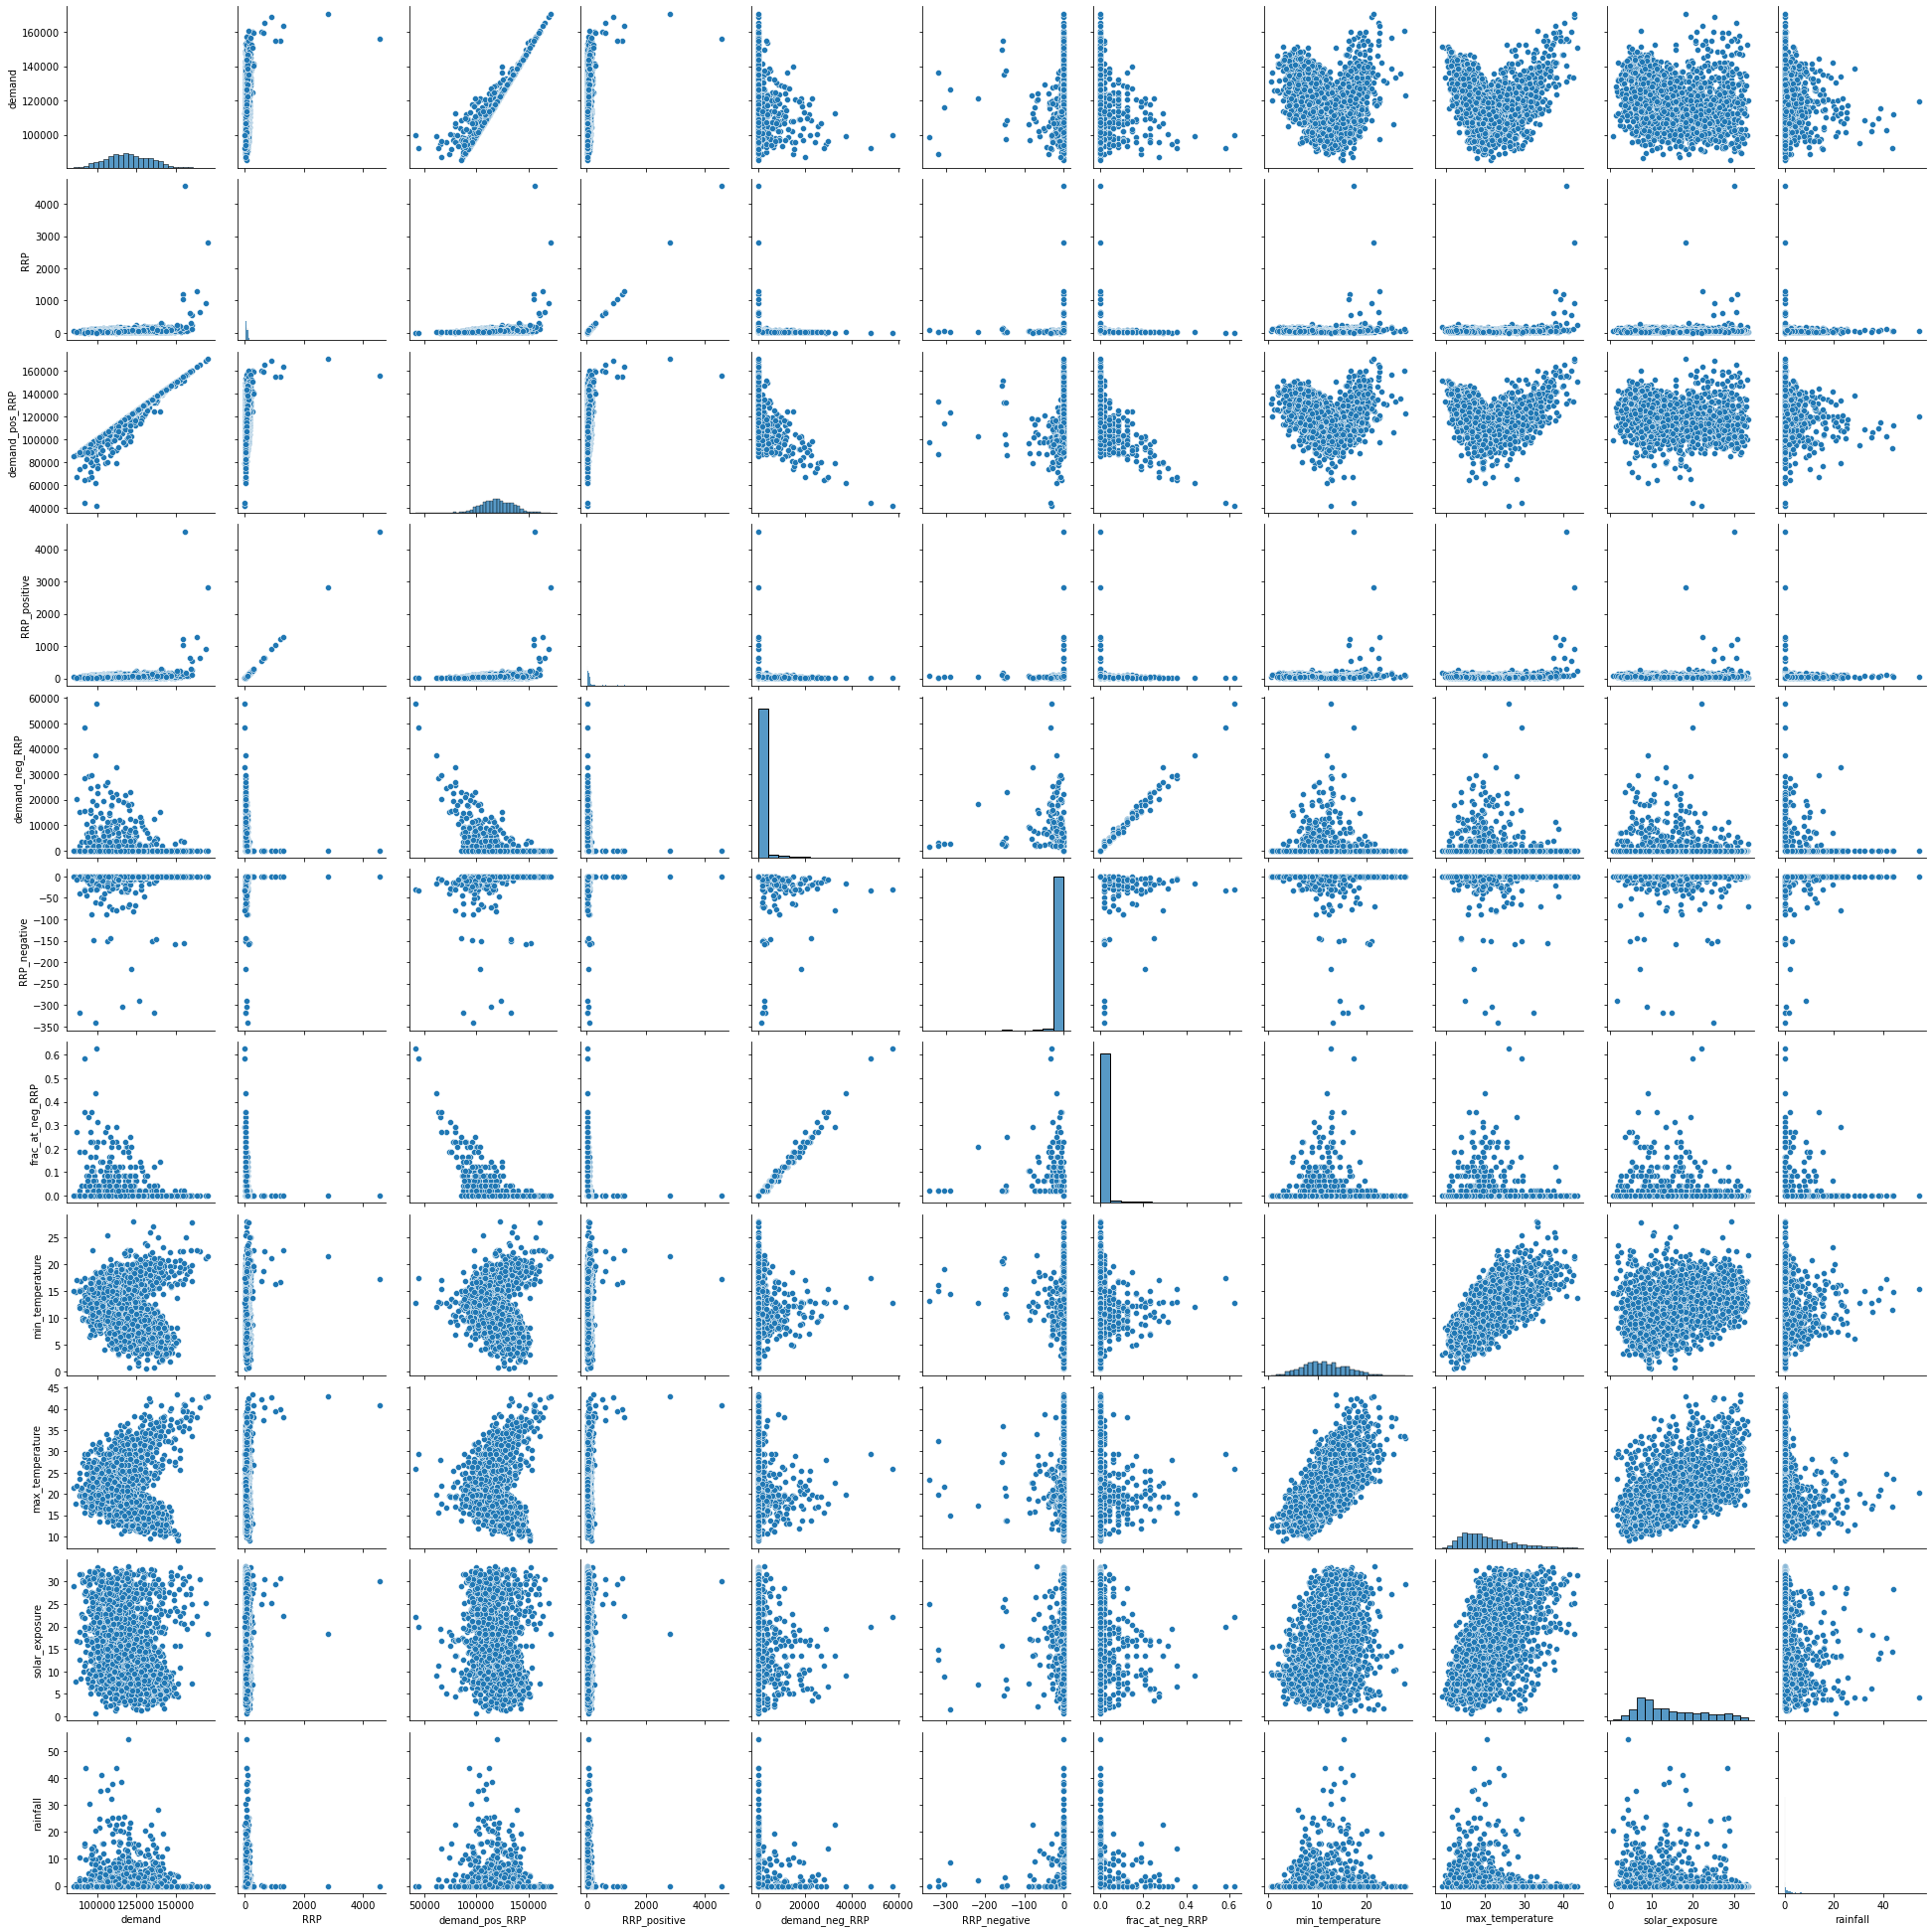

In [6]:
sns.pairplot(data)

* Crie um gráfico linear para as colunas que mais parecem se correlacionar 